In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class LinearRegressor():
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features).reshape(-1,1)
    self.bias = 0
    for _ in range(0,self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias
      #step-size
      dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
      db = (1/n_samples) * np.sum(y_pred-y)
      #new weights
      self.weights = self.weights - (self.lr * dw)
      self.bias = self.bias - (self.lr * db)

  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

In [ ]:
def euclidean_distance(x1,x2):
  sum = np.sum((x1-x2)**2)
  final = sum**0.5
  return final

class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predicted = [self._predict(x) for x in X]
    return np.array(predicted)

  def _predict(self,x):
    distance = [euclidean_distance(x, x_train) for x_train in self.X_train]
    #select k nearest indices
    k_indices = np.argsort(distance)[:self.k]
    k_nearest_values = [self.y_train[i] for i in k_indices]
    #Taking Avg of the value.
    result = np.sum(k_nearest_values)/len(k_nearest_values)
    return result


In [ ]:
np.sum(cascaa)

985

In [ ]:
X = np.random.randint(low = -10, high = +10, size=(100, 3))
y = np.random.randint(low = 0, high = 50, size=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 3) (80,) (20, 3) (20,)


In [ ]:
def rmse(y, y_pred):
  sse = np.sum((y - y_pred)**2)
  mse = (sse/len(y))**0.5
  return mse

In [ ]:
#Reshaping the y_train and y_test
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

In [ ]:
#model
model = LinearRegressor()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.weights

array([[-0.445609  ],
       [ 0.0653661 ],
       [ 0.33388215]])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[19.9451    ],
       [14.96133484],
       [20.10679125],
       [16.80727889],
       [20.47378204],
       [17.07765297],
       [12.78800066],
       [15.88250504],
       [16.81173373],
       [14.6013957 ],
       [11.23031678],
       [14.43970445],
       [13.00570112],
       [14.68086509],
       [14.79259194],
       [14.83190105],
       [11.57254898],
       [14.38053881],
       [16.48360483],
       [13.10417586]])

In [ ]:
rmse(y_test, y_pred) #This is for default lr = 0.001

18.662662496908357

In [ ]:
#lets check for differet learning rate.
b = np.linspace(0.1, 0.001, 20)

In [ ]:
result_lr = []
for _ in b:
  ll = LinearRegressor(lr=_)
  ll.fit(X_train, y_train)
  out = ll.predict(X_test)
  result_lr.append(rmse(y_test,out.reshape(-1,1)))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-5-3db23a61b92d>:2: RuntimeWarning: overflow encountered in square
  sse = np.sum((y - y_pred)**2)


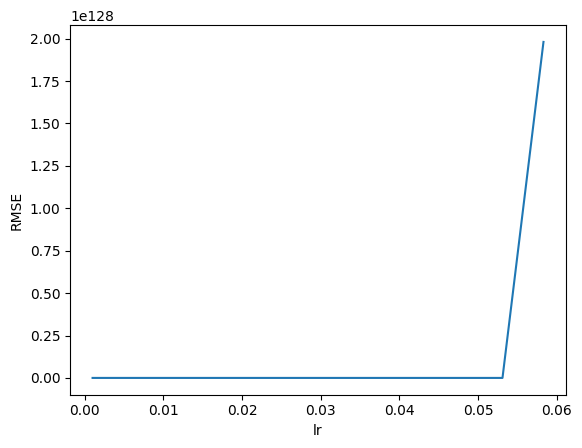

In [ ]:
plt.plot(b,result_lr)
plt.xlabel("lr")
plt.ylabel("RMSE")
plt.show()

In [ ]:
best = np.argsort(result_lr)[:1] #best result
result_lr[best[0]]

17.09042816796039

In [ ]:
#best learning rate
b[best[0]]

0.006210526315789486

In [ ]:
# KNN model

In [ ]:
knn_model = KNN()

In [ ]:
knn_model.fit(X_train, y_train)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred.shape

(20,)

In [ ]:
y_pred

array([29.66666667, 22.        , 26.33333333, 26.33333333, 15.33333333,
       27.        , 31.        , 12.66666667,  8.33333333, 24.66666667,
       10.66666667, 30.33333333,  8.        , 31.        , 31.        ,
       29.        , 28.66666667, 27.33333333, 37.33333333, 11.33333333])

In [ ]:
rmse(y_test, y_pred.reshape(-1,1))   # This is for default k=3

19.340085027964303

In [ ]:
#Now lets check best value of k for this.
result = []
for i in range(3,40):
  ss = KNN(k=i)
  ss.fit(X_train, y_train)
  y_pred = ss.predict(X_test)
  rm = rmse(y_test, y_pred.reshape(-1,1))
  result.append(rm)
print(result)

[19.340085027964303, 19.618629539292492, 18.764008100616454, 18.131962264342917, 18.21207269469169, 18.157449401003433, 18.596428702679102, 17.7111687926009, 17.397895759530925, 17.30523563998929, 17.377406606137452, 16.612802415054258, 16.698855582876863, 16.643551679254042, 16.40157811632412, 16.018570434512316, 15.856218577896426, 15.972272850161307, 16.126702128518097, 16.15219773701205, 16.234566613220466, 16.12394214876333, 16.23318576250515, 16.555371498211297, 16.71867194993512, 16.91308627202315, 16.856262662973045, 16.83163192721767, 16.89151588973203, 16.807181431050537, 16.811412779201234, 16.726302763977735, 16.612333750953272, 16.510390013414636, 16.418654207631437, 16.223870959782303, 16.15468557037592]


In [ ]:
best = np.argsort(result)[:1] #best result
result[best[0]]

15.856218577896426

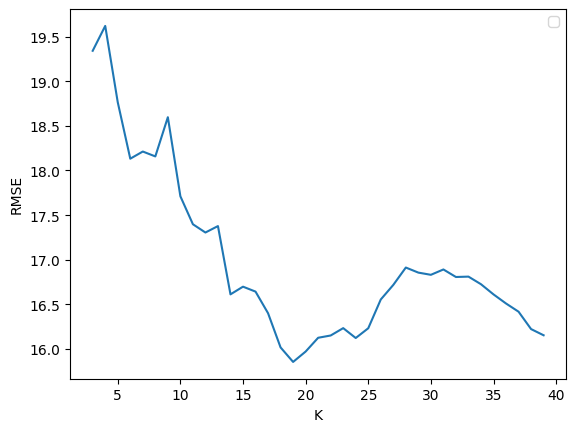

In [ ]:
a = np.arange(3,40)
plt.plot(a,result)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.legend()
plt.show()

- We can see at K=5 RMSE value is the least hence best k = 5.
- RMSE value of:
  - KNN = 12.3 at k=5
  - LR = 12.38 at lr=0.0426